## Breast Cancer Prediction

Breast Cancer Preiction obiettivi del progetto quali sono Utilizzando il Breast Cancer Wisconsin (diagnostica) Database, possiamo creare un classificatore che può aiutare a diagnosticare i pazienti e prevedere la probabilità di un cancro al seno. Verranno esplorate alcune tecniche di apprendimento automatico.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

leggo il dataset

In [61]:
df = pd.read_csv('data.csv')
df.sample(50)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
379,9013838,M,11.080,18.83,73.30,361.6,0.12160,0.21540,0.168900,0.063670,...,32.82,91.76,508.1,0.21840,0.93790,0.840200,0.25240,0.4154,0.14030,NaN
181,873593,M,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.248700,0.149600,...,33.48,176.50,2089.0,0.14910,0.75840,0.678000,0.29030,0.4098,0.12840,NaN
205,879523,M,15.120,16.68,98.78,716.6,0.08876,0.09588,0.075500,0.040790,...,20.24,117.70,989.5,0.14910,0.33310,0.332700,0.12520,0.3415,0.09740,NaN
444,9110127,M,18.030,16.85,117.50,990.0,0.08947,0.12320,0.109000,0.062540,...,22.02,133.30,1292.0,0.12630,0.26660,0.429000,0.15350,0.2842,0.08225,NaN
262,888570,M,17.290,22.13,114.40,947.8,0.08999,0.12730,0.096970,0.075070,...,27.24,137.90,1295.0,0.11340,0.28670,0.229800,0.15280,0.3067,0.07484,NaN
327,895299,B,12.030,17.93,76.09,446.0,0.07683,0.03892,0.001546,0.005592,...,22.25,82.74,523.4,0.10130,0.07390,0.007732,0.02796,0.2171,0.07037,NaN
281,8912055,B,11.740,14.02,74.24,427.3,0.07813,0.04340,0.022450,0.027630,...,18.26,84.70,533.7,0.10360,0.08500,0.067350,0.08290,0.3101,0.06688,NaN
363,9010872,B,16.500,18.29,106.60,838.1,0.09686,0.08468,0.058620,0.048350,...,25.45,117.20,1009.0,0.13380,0.16790,0.166300,0.09123,0.2394,0.06469,NaN
43,856106,M,13.280,20.28,87.32,545.2,0.10410,0.14360,0.098470,0.061580,...,28.00,113.10,907.2,0.15300,0.37240,0.366400,0.14920,0.3739,0.10270,NaN
490,91376701,B,12.250,22.44,78.18,466.5,0.08192,0.05200,0.017140,0.012610,...,31.99,92.74,622.9,0.12560,0.18040,0.123000,0.06335,0.3100,0.08203,NaN


numero righe e colonne del dataset

In [62]:
df.shape

(569, 33)

## Data Cleaning (rimozione valori nulli, duplicati)

stampo le info del dataset per fare una panoramica

In [63]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

controlliamo se ci sono valori nulli.

In [64]:
# Identifica le colonne con almeno un valore nullo
colonne_con_valori_nulli = df.columns[df.isnull().any()].tolist()

# Stampa le colonne con valori nulli
print("Colonne con valori nulli:")
print(colonne_con_valori_nulli)


Colonne con valori nulli:
['Unnamed: 32']


eliminiamo la colonna 32

In [65]:
df.drop(columns=['Unnamed: 32'], inplace=True)
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

La prima cosa da fare è di enumerare la colonna di diagnosi tale che M = 1, B = 0. In questo modo possono essere usati come input per algoritmi di ml.

In [66]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


controllo se sono presenti valori nulli.

In [67]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

non ci sono valori nulli, verifico se ci sono duplicati.

In [68]:
df.duplicated().sum()

0

non ci sono duplicati.

## Data Undestanding

fase in cui i dati vengono esplorati, visualizzati e compresi per scoprire informazioni rilvenanti ,tendenze, relazioni e anomalie nei dati.

In [69]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

quindi il mio dataset ha 357 cellule maligne e 212 benigne.

vado a rappresentare tali informazioni usando un grafico a torta

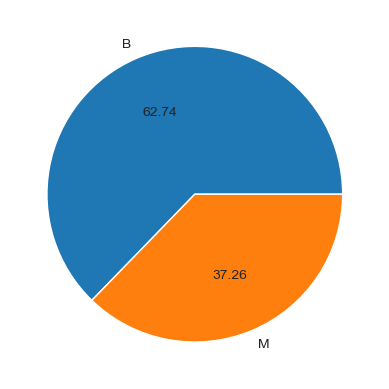

In [70]:
plt.pie(df['diagnosis'].value_counts(), labels=['B', 'M'], autopct="%0.2f")
plt.show()

Ora stampo un grafico riassuntivo, un pairplot. In un pairplot, ciascuna variabile numerica presente nel dataset viene confrontata con tutte le altre variabili numeriche tramite grafici a dispersione, quindi consentono di visualizzare e individuare eventuali relazioni o tendenze tra le variabili.

C:\Users\Utente\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


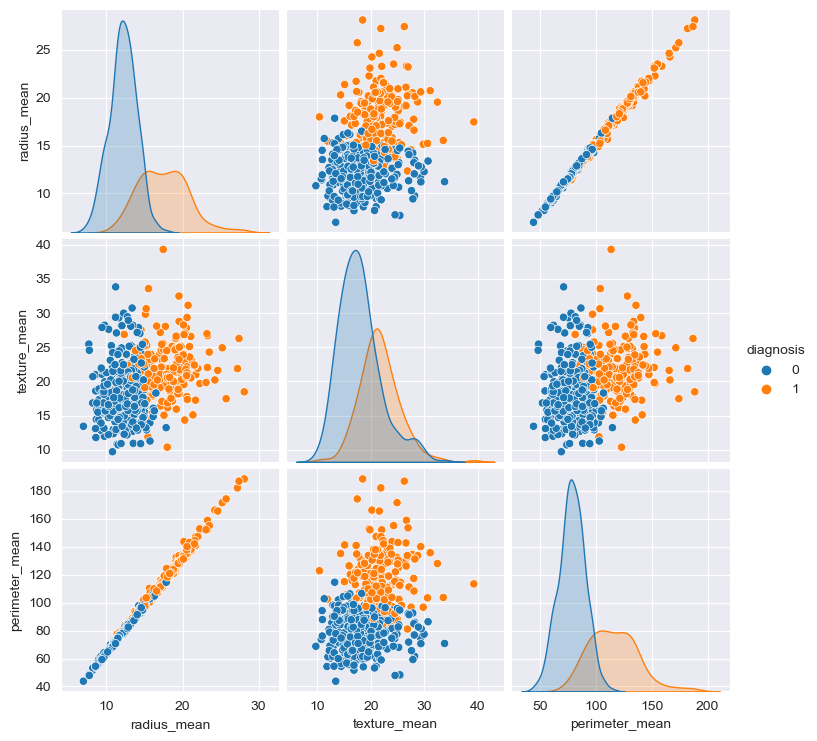

In [71]:
sns.pairplot(df.iloc[:,1:5],hue="diagnosis")

emerge dal pairplot:
    - radius_mean benigni sono di piu rispetto ai maligni
    -texture_mean benigne sono di piu rispetto ai  maligni
    -perimeter_mean benigni sono di piu rispetto ai maligni

## Data preparation(Feature scaling) 

normalizzo i valori numerici

In [80]:
from sklearn.preprocessing import MinMaxScaler

#colonne che voglio normalizzare
features_to_normalize = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean',
'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst',
'texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst',
'fractal_dimension_worst']

#oggetto che permette la normalizzazione
scaler = MinMaxScaler() 

df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

stampo un campione per vedere se tutto ha avuto successo

In [81]:
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,87930,0,0.259785,0.300643,0.257757,0.143542,0.424483,0.265076,0.187559,0.189911,...,0.250445,0.336354,0.227302,0.121092,0.471703,0.204238,0.213339,0.348797,0.285630,0.212908
62,858986,1,0.344030,0.420697,0.363693,0.213022,0.471879,0.556469,0.500234,0.430070,...,0.346496,0.466151,0.342099,0.190302,0.613023,0.579610,0.552875,0.613402,0.252119,0.381477
193,875263,1,0.253632,0.579980,0.258172,0.141633,0.458337,0.355561,0.254217,0.226740,...,0.274635,0.728145,0.255441,0.143458,0.708776,0.430102,0.353435,0.501375,0.325251,0.429359
37,854941,0,0.286289,0.294555,0.268261,0.161315,0.335831,0.056070,0.060028,0.145278,...,0.191035,0.287580,0.169580,0.088650,0.170640,0.018337,0.038602,0.172268,0.083185,0.043618
168,8712766,1,0.496427,0.506256,0.499689,0.356776,0.471879,0.432243,0.505858,0.518390,...,0.541089,0.541311,0.522387,0.362466,0.438685,0.345112,0.390575,0.591409,0.117288,0.248983
545,922576,0,0.314213,0.457220,0.299910,0.182269,0.359574,0.147506,0.069681,0.121421,...,0.263963,0.454957,0.234922,0.133848,0.333025,0.120703,0.083786,0.246529,0.212300,0.095041
362,9010598,0,0.273510,0.308759,0.263147,0.149777,0.398393,0.184467,0.062980,0.088519,...,0.207044,0.372335,0.186314,0.096957,0.387176,0.151944,0.100240,0.285636,0.232407,0.113735
105,863030,1,0.290075,0.197836,0.300048,0.164030,0.786946,0.481934,0.485239,0.477187,...,0.298115,0.276652,0.278849,0.157786,0.759625,0.371210,0.509265,0.682474,0.311847,0.560540
114,864496,0,0.082588,0.206967,0.083270,0.037073,0.563059,0.192105,0.096813,0.095626,...,0.060406,0.202559,0.070073,0.024381,0.668494,0.202880,0.196166,0.360825,0.268283,0.306047
207,879830,1,0.474656,0.356781,0.455463,0.322715,0.316783,0.164591,0.162840,0.267893,...,0.422270,0.347281,0.396384,0.251868,0.263686,0.117696,0.154313,0.376632,0.337079,0.063295


## Data preparation(Feature Selection)

Qui faremo feature Selection con diversi metodi: feature selection with correlation, univariate feature selection, recursive feature elimination (RFE), recursive feature elimination with cross validation (RFECV)

1) feature selection with correlation:
 - Vado a visualizzare gli stessi dati con la matrice di correlazione, che mi restituisce le correlazioni tra le variabili del dataset.

In [72]:
df.iloc[:,1:32].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


vado a rappresentare tali valori con una heatmap che utilizza colori per visualizzare i valori dei coefficienti di correlazione tra le diverse coppie di variabili nel dataset, consentendo di individuare facilmente relazioni tra di esse.
All'interno della mappa:
- Le celle più scure o più chiare indicano correlazioni più forti o più deboli, rispettivamente. 
- le variabili che sono fortemente correlate tra loro (valori vicini a 1 o -1) o variabili che hanno una bassa correlazione (valori vicini a 0).

<Axes: >

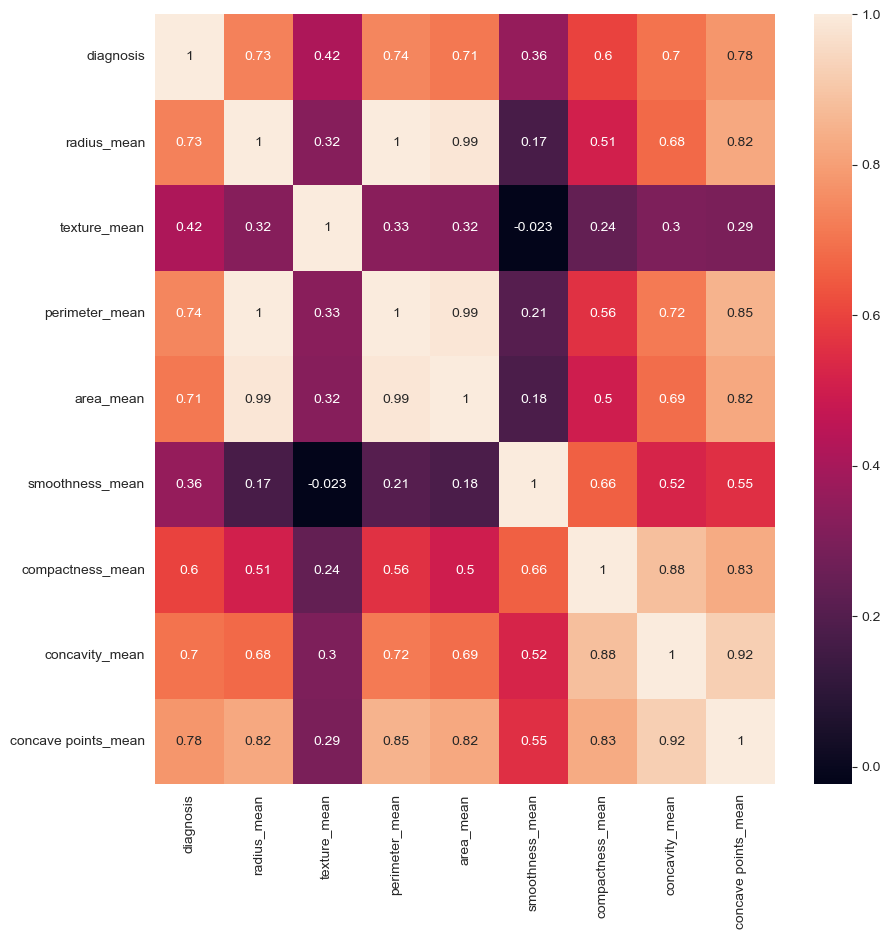

In [73]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:10].corr(), annot=True)


Dalla heatmap emergono svariate considerazioni facilemente spiegabili: 
- forte correlazione tra area_mean e radius_mean
- forte correlazione tra perimeter_mean e area_mean 

2)In univariate feature selection, useremo SelectKBest che rimuove tutte le funzionalità di punteggio più alto tranne k.

## Data Preparation(Data Balencing)

## modeling

Estrazione delle caratteristiche e delle etichette:

In [39]:
#split the dataset into dependent(X) and independent(Y) dataset
X=df.iloc[:, 2:31].values
Y=df.iloc[:,1].values

Divisione del dataset in set di addestramento e test:

In [40]:
#splitting the data into trainning and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


Standardizzazione delle caratteristiche:

In [41]:

x_train_N = (X_train - X_train.mean()) / (X_train.max() - X_train.min())
x_test_N = (X_test - X_test.mean()) / (X_test.max() - X_test.min())


In [57]:
#feature scaling normalizzazione

from sklearn.preprocessing import StandardScaler
# Normalizzazione del set di addestramento
scaler_train = StandardScaler()
X_train=scaler_train.fit_transform(X_train)
# Normalizzazione del set di test utilizzando lo stesso scaler del set di addestramento
X_test=scaler_train.transform(X_test)

In [ ]:



# Ora X_train_normalized e X_test_normalized contengono rispettivamente le caratteristiche normalizzate per il set di addestramento e test
